In [1]:
%matplotlib notebook

import os
import sys
import time, datetime
import numpy as np
import matplotlib as mpl
import re

from collections import OrderedDict
from importlib import reload
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import qcodes as qc
from qcodes.dataset.measurements import Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.dataset.data_set import DataSet, load_by_id
from qcodes.dataset.database import initialise_database, get_DB_location

from qcodes.dataset.data_export import get_shaped_data_by_runid, get_data_by_id
from qcodes.dataset.data_set import load_by_id


<IPython.core.display.Javascript object>


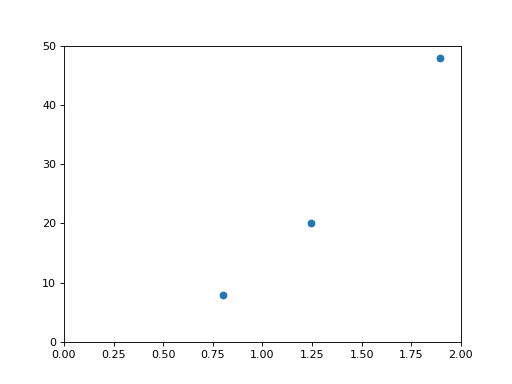

array([ 37.06039521, -23.37265237])

In [4]:
L = [0.8,1.244,1.896]
R = [7.9,20,48]

plt.figure()
plt.plot(L,R,'o')
plt.xlim(0,2)
plt.ylim(0,50)

np.polyfit(L,R,1)

In [5]:
experiment_date = datetime.date.today().strftime('%Y-%m-09')
pretty_path = '\OneDrive\BF3\Data\experiments_' + experiment_date + '.db'
path = r'C:\Users\Administrator' + pretty_path
print(path)
qc.config["core"]["db_location"] = path
# automatically uses a different DB file for each month

initialise_database()
# creates a new DB file if nonexistant; leaves it untouched if file already exists

C:\Users\Administrator\OneDrive\BF3\Data\experiments_2019-04-09.db


<IPython.core.display.Javascript object>


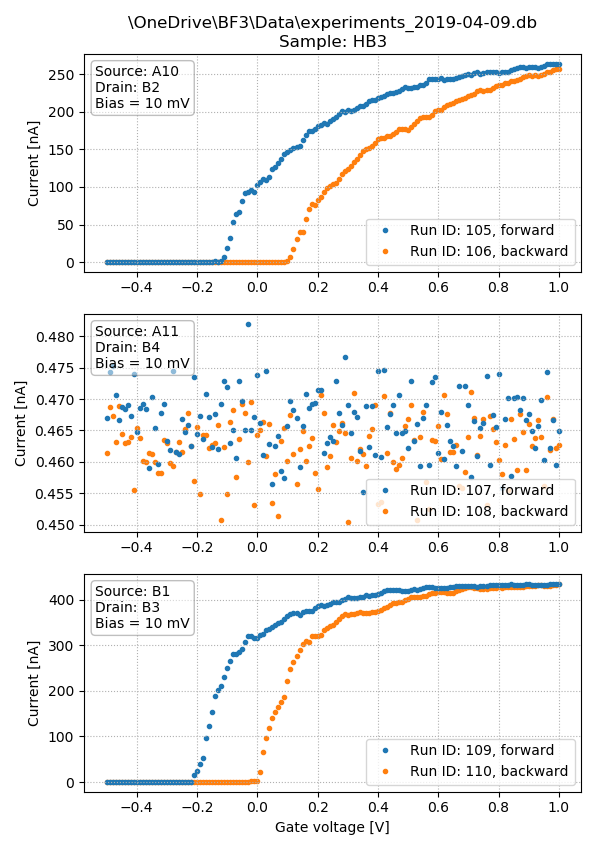

In [17]:
IDs = [105,106,107,108,109,110]
biases = [10,10,10,10,10,10] #mV
backward = [False,True,False,True, False, True]

def plot_pinchoff(IDs, biases, backward):
    if (len(IDs) != len(biases)) or (len(IDs) != len(backward)):
        print('Warning: first, second and third argument must have the same length')
    else:
        N = len(IDs)
        
    data = []
    devices = []
    sources = []
    drains = []
    for i in range(N):
        dat = load_by_id(IDs[i])
        sample_name = dat.sample_name
        device = re.search('(.+?)_', sample_name).group(1)
        source_letter = re.search('_(.+?)', sample_name).group(1)
        source_number = re.search('_' + source_letter + '([0-9]+)', sample_name).group(1)
        drain_letter = re.search('_' + source_letter + source_number + '(.+?)', sample_name).group(1)
        drain_number = re.search('_' + source_letter + source_number + drain_letter + '([0-9]+)', sample_name).group(1)
        source = source_letter + source_number
        drain = drain_letter + drain_number
        data.append(dat)
        devices.append(device)
        sources.append(source)
        drains.append(drain)
        
    for i in range(1,N):
        if devices[0] != devices[i]:
            print('Warning: you are plotting measures from different devices!')
            print('Devices:' + devices[0] + ',' + devices[i])
        else:
            device = devices[0]
    
    n_subplots = int(np.ceil(N/2))
    figsize = (6, 1 + 2.5*n_subplots)
    plt.figure(sample_name, figsize=figsize).set_tight_layout(True)
    plt.grid(True)
    subplot = 1
    plt.subplot(n_subplots, 1, subplot)
    plt.title(pretty_path + '\nSample: {}'.format(device))
    for i in range(N):
        subplot = i//2 + 1
        #puts two measurements per figure, IDs have to be in the right order
        plt.subplot(n_subplots, 1, subplot)
        gate_voltage = data[i].get_data('mdac_PG_voltage')
        current = data[i].get_data('current')
        if backward[i] == True:
            label = 'Run ID: {}, backward'.format(IDs[i])
            zorder = 0
        else:
            label = 'Run ID: {}, forward'.format(IDs[i])
            zorder = 1
        plt.plot(gate_voltage, 1e9*np.array(current), '.', label=label, zorder=zorder)
        plt.ylabel('Current [nA]')
        plt.grid(linestyle=':')
        plt.legend(loc=4)
        subplot
        if subplot == n_subplots:
            plt.xlabel('Gate voltage [V]')
    
    left, right = plt.xlim()
    for k in range(n_subplots):
        plt.subplot(n_subplots, 1, k+1)
        l, r = plt.xlim()
        left = min(l, left)
        right = max(r, right)
    for k in range(n_subplots):
        plt.subplot(n_subplots, 1, k+1)
        plt.xlim(left, right)
        
    for k in range(n_subplots):
        plt.subplot(n_subplots, 1, k+1)
        bottom, top = plt.ylim()
        y = top - 0.05*(top - bottom)
        x = left + 0.023*(right - left)
        box_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.5)
        box_text = 'Source: {}\nDrain: {}\nBias = {} mV'.format(sources[2*k], drains[2*k], biases[2*k])
        plt.text(x, y, box_text, horizontalalignment='left', verticalalignment='top', bbox=box_props)
        
    name = 'Albertos_plots/' + experiment_date + '_' + device
    plt.savefig(name, dpi=300)

plot_pinchoff(IDs, biases, backward)

<IPython.core.display.Javascript object>


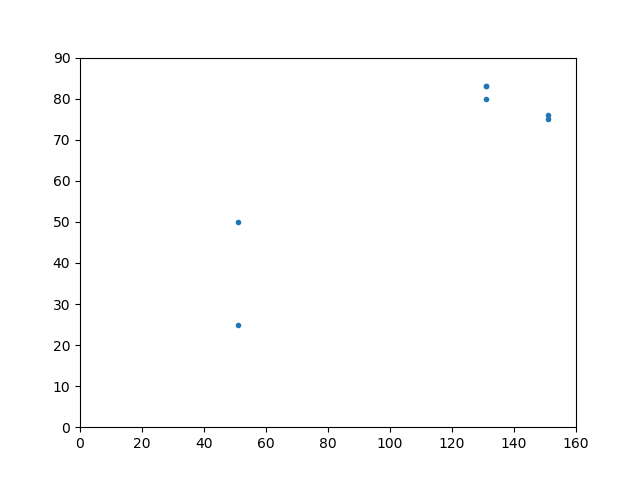

(0, 90)

In [87]:
def retta(x, a, b):
    return a*x + b

points = [51, 51, 131, 131, 131, 151, 151]
times = [25, 50, 80, 83, 83, 75, 76] #s

plt.figure('fit')
plt.plot(points, times, '.')
plt.xlim(0,160)
plt.ylim(0,90)

In [90]:
 print(plt.rcParams["savefig.dpi"])

figure


In [20]:
ts = time.time()
time.sleep(0.01)
print(time.time() - ts)

0.013504981994628906


In [35]:
def get_time_diff(val):
    while True:
        yield val()
        
        
def time_window(t0, count):
    while 1:
        
    for kk in range(count):
        yield get_next(time.time) - t0
    

In [42]:
list(time_window(time.time(), 20))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [43]:
for t in time_window(time.time(), 10):
    time.sleep(0.1)
    print(t)
    
for t in time_window(time.time(), 20):
    time.sleep(0.1)
    print(t)

0.0
0.10158944129943848
0.2036583423614502
0.305234432220459
0.4072723388671875
0.5093410015106201
0.6117660999298096
0.7134499549865723
0.8181941509246826
0.9238026142120361
0.0
0.10177493095397949
0.20431780815124512
0.3103911876678467
0.4124917984008789
0.5140304565429688
0.6161942481994629
0.7182650566101074
0.8298418521881104
0.9318056106567383
1.0384023189544678
1.1480886936187744
1.2496542930603027
1.3512623310089111
1.452824592590332
1.5554051399230957
1.6580479145050049
1.7600882053375244
1.8616998195648193
1.9662590026855469
